In [1]:
import  pandas as pd


In [2]:
movies = pd.read_csv('mv.data - Copy.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
movies = pd.read_csv('mv.data - Copy.csv',usecols=['movieId','title'])
movies.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [4]:
ratings = pd.read_csv('ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
ratings = pd.read_csv('ratings.csv',usecols=['userId','movieId','rating'])
ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [6]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   userId   49 non-null     int64  
 1   movieId  49 non-null     int64  
 2   rating   49 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 1.3 KB


In [7]:
ratings.shape

(49, 3)

In [8]:
movies.shape

(49, 2)

In [9]:
ratings.pivot(index='movieId',columns='userId',values='rating')

userId,1
movieId,
1,4.0
3,4.0
6,4.0
47,5.0
50,5.0
70,3.0
101,5.0
110,4.0
151,5.0


In [10]:
ratings.pivot(index='movieId',columns='userId',values='rating').fillna(0)

userId,1
movieId,
1,4.0
3,4.0
6,4.0
47,5.0
50,5.0
70,3.0
101,5.0
110,4.0
151,5.0


In [11]:
movies_users = ratings.pivot(index='movieId',columns='userId',values='rating').fillna(0)
movies_users.head()

userId,1
movieId,
1,4.0
3,4.0
6,4.0
47,5.0
50,5.0


In [31]:
df = pd.merge(movies,ratings)
df.head()

,movieId,title,userId,rating
0,1,Toy Story (1995),1,4.0
1,3,Grumpier Old Men (1995),1,4.0
2,6,Heat (1995),1,4.0
3,47,Seven (a.k.a. Se7en) (1995),1,5.0


In [42]:
import matplotlib.pyplot as plt


In [43]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Seven (a.k.a. Se7en) (1995)    5.0
Grumpier Old Men (1995)        4.0
Heat (1995)                    4.0
Toy Story (1995)               4.0
Name: rating, dtype: float64

In [44]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Grumpier Old Men (1995)        1
Heat (1995)                    1
Seven (a.k.a. Se7en) (1995)    1
Toy Story (1995)               1
Name: rating, dtype: int64

In [45]:
rating = pd.DataFrame(df.groupby('title')['rating'].mean())
rating.head()

,rating
title,
Grumpier Old Men (1995),4.0
Heat (1995),4.0
Seven (a.k.a. Se7en) (1995),5.0
Toy Story (1995),4.0


In [46]:
rating['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
rating.head()

,rating,num of ratings
title,,
Grumpier Old Men (1995),4.0,1
Heat (1995),4.0,1
Seven (a.k.a. Se7en) (1995),5.0,1
Toy Story (1995),4.0,1


<AxesSubplot: >

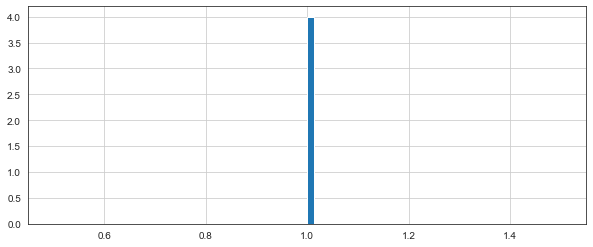

In [56]:
plt.figure(figsize=(10,4))
rating['num of ratings'].hist(bins=70)

<AxesSubplot: >

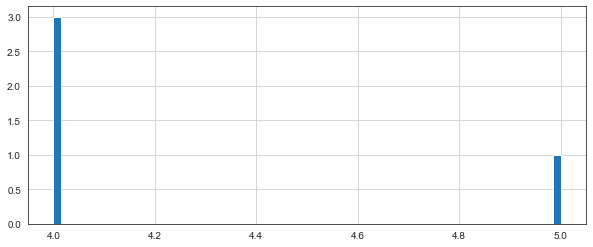

In [48]:
plt.figure(figsize=(10,4))
rating['rating'].hist(bins=70)

In [12]:
from scipy.sparse import csr_matrix

In [13]:
mat_movies = csr_matrix(movies_users.values)
mat_movies

<49x1 sparse matrix of type '<class 'numpy.float64'>'
	with 49 stored elements in Compressed Sparse Row format>

In [14]:
from sklearn.neighbors import NearestNeighbors


In [15]:
model = NearestNeighbors(metric = 'cosine', algorithm = 'brute', n_neighbors = 10)
model.fit(mat_movies)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=10)

In [16]:
from fuzzywuzzy import process

c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [57]:
def recommender(movie_name):
    idx = process.extractOne(movie_name,movies['title'])
    print(idx)

In [59]:
recommender('toy story')

('Toy Story (1995)', 90, 0)


In [17]:
def recommender(movie_name,data,n):
    idx = process.extractOne(movie_name,movies['title'])[2]
    print('Movie Selected : ',movies['title'][idx], 'Index : ',idx)
    print('Searching for recommendation.......')
    distance,indices=model.kneighbors(data[idx],n_neighbors=n)
    print(distance,indices)
    for i in indices :
        print(movies['title'][i])
    


    

In [18]:
recommender('toy story ', mat_movies ,20)

Movie Selected :  Toy Story (1995) Index :  0
Searching for recommendation.......
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] [[36 45 46 47 43 44 37 25 35 34 33 32 31 30 29 28 27 38 24 40]]
36                        Across the Sea of Time (1995)
45                 How to Make an American Quilt (1995)
46                          Seven (a.k.a. Se7en) (1995)
47                                    Pocahontas (1995)
43                                 Mortal Kombat (1995)
44                                    To Die For (1995)
37                                  It Takes Two (1995)
25                                       Othello (1995)
35                              Dead Man Walking (1995)
34                                    Carrington (1995)
33                                          Babe (1995)
32                              Wings of Courage (1995)
31            Twelve Monkeys (a.k.a. 12 Monkeys) (1995)
30                               Dangerous Minds (1995)
29    